# 简介
实现 柱形图的动态效果
由于 jupyter 不能实时显示，因此在这里，显示不了动态的效果。

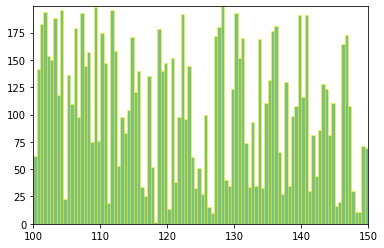

In [1]:
import numpy as np
from time import time

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation


# ****************************************
# 程序开始时间

ReadTimeInterval = 100 # ms

StratTimeCount = None
EndTimeCount = None

# 音乐文件
PathToWav = "周杰伦-迷魂曲.wav"  
# 保存PCm数据
PcmDataFile = "PcmData.txt"
# 指向音频数据
PcmData = None
# 采样频率
FftSamplingFrequency = 44100

# 生成的直方图的个数
_BarCount = 100

# 左边起始地点
_LeftStart = None

# 幅度最大值
_TopMaxValue = 200
# ****************************************


# ****************************************
def GetMusicParams(Path):
    fd = wave.open(Path, 'rb')
    params = fd.getparams()  # get wave file params
    print(params)
    nchannels, sampwidth, framerate, nframes = params[:4]
    return fd, nchannels, sampwidth, framerate, nframes
    pass

def ReadTimeToCount(ReadTime=10, nchannels=2, framerate=44100, sampwidth=2):
    # 读 ReadTime ms的数据，需要读多少字节
    # 1, 根据 framerate 算出 ， 1ms 会采样多少组数据
    _SampleCount = int(framerate / 1000)
    # 2, ReadTime * _SampleCount * sampwidth
    count = ReadTime * _SampleCount * sampwidth
    return int(count)

def SampwidthToType(sampwidth):
    if sampwidth == 1:
        return np.int8
    if sampwidth == 2:
        return np.int16
    if sampwidth == 3:
        return np.int24
    pass

def SampwidthToType(sampwidth):
    if sampwidth == 1:
        return np.int8
    if sampwidth == 2:
        return np.int16
    if sampwidth == 3:
        return np.int24
    pass
# ****************************************

# ***************************************



# *************************************** 
# 主调用

data = np.linspace(100,150,_BarCount + 1)
higth = np.random.randint(0,200,_BarCount)
left = np.array(data[:-1])
right = np.array(data[1:])
bottom = np.zeros(len(left))
# print(higth.size)
# print(bottom.size)
top = bottom + higth


#############################################################################
# It should be noted that instead of creating a three-dimensional array and
# using `~.path.Path.make_compound_path_from_polys`, we could as well create
# the compound path directly using vertices and codes as shown below

nrects = len(left)
nverts = nrects*(1+3+1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom


patch = None
# 跟更新 矩形
def animate(i):
    # simulate new data coming in
    data = np.random.randint(0,_TopMaxValue,_BarCount)
    # n, bins = np.histogram(data, _Numbers)
    # print(data)
    top = bottom + data
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

def init():
    [patch, ]
    pass

fig, ax = plt.subplots()
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=100,
                              init_func=init,
                              interval=ReadTimeInterval,
                              blit=False)


plt.show()

